In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from scipy.stats import binom

The binomial distribution model deals with finding the probability of success of an event which has only two possible outcomes in a series of experiments. For example, tossing of a coin always gives a head or a tail. The probability of finding exactly 3 heads in tossing a coin repeatedly for 10 times is estimated during the binomial distribution.

In [18]:
data=binom.rvs(n=6,p=0.5,size=100)
data

array([3, 0, 3, 4, 4, 3, 2, 2, 1, 2, 3, 3, 4, 3, 5, 5, 3, 4, 2, 4, 3, 4,
       5, 2, 5, 3, 0, 1, 4, 5, 3, 3, 2, 4, 1, 4, 5, 4, 2, 1, 4, 4, 2, 2,
       3, 5, 2, 3, 4, 3, 6, 2, 3, 3, 4, 1, 4, 4, 3, 4, 4, 5, 4, 2, 3, 3,
       2, 3, 3, 3, 3, 5, 3, 3, 2, 2, 4, 3, 2, 4, 5, 2, 4, 3, 4, 2, 1, 5,
       2, 2, 5, 5, 0, 3, 4, 3, 1, 3, 6, 2])

In [27]:
np.unique(data,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 3,  7, 21, 30, 24, 13,  2], dtype=int64))

In [29]:
data1=pd.Series(data)

In [32]:
data1.value_counts(sort=False)

0     3
1     7
2    21
3    30
4    24
5    13
6     2
dtype: int64

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


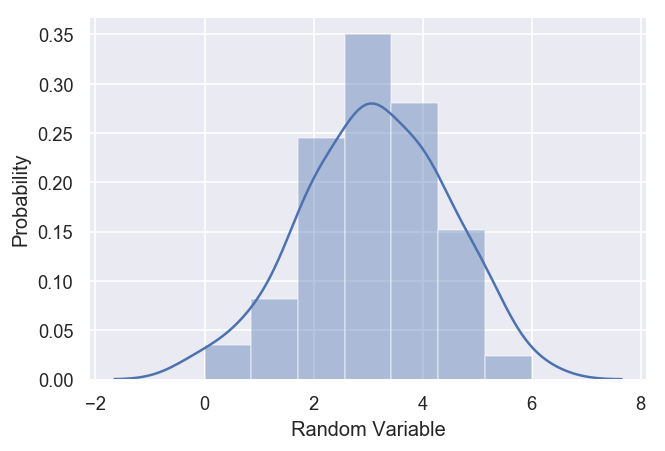

In [33]:
plt.figure(dpi=120)
sns.distplot(data)
plt.xlabel("Random Variable")
plt.ylabel("Probability")
plt.show()

Suppose a biased coin comes up heads with probability 0.7 when tossed. What is the probability of achieving 0, 1,..., 6 heads after six tosses?

In [47]:
binom.pmf(k=0,n=6,p=0.7)

0.0007290000000000004

In [48]:
for i in np.arange(0,7):
    print(i,"->",binom.pmf(k=i,n=6,p=0.7))

0 -> 0.0007290000000000004
1 -> 0.010206000000000008
2 -> 0.05953500000000001
3 -> 0.18522000000000008
4 -> 0.32413499999999995
5 -> 0.3025260000000001
6 -> 0.11764899999999995


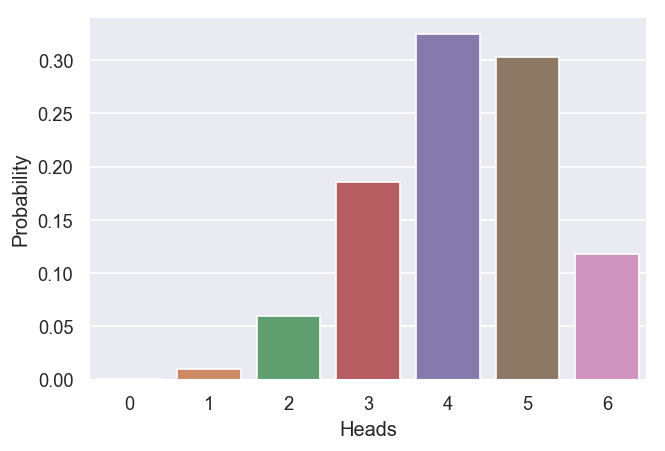

In [49]:
heads,prob=[],[]
for i in np.arange(0,7):
    heads.append(i)
    prob.append(binom.pmf(k=i,n=6,p=0.7))
df=pd.DataFrame({"Heads":heads,"Probability":prob})
plt.figure(dpi=120)
sns.barplot(x="Heads",y="Probability",data=df)
plt.show()

In [50]:
heads,pdf_data,cdf_data=[],[],[]
for i in np.arange(0,7):
    heads.append(i)
    pdf_data.append(binom.pmf(k=i,n=6,p=0.7))
    cdf_data.append(binom.cdf(k=i,n=6,p=0.7))
df=pd.DataFrame({"Heads":heads,"PDF":pdf_data,"CDF":cdf_data})
df

,Heads,PDF,CDF
0,0,0.000729,0.000729
1,1,0.010206,0.010935
2,2,0.059535,0.070470
3,3,0.185220,0.255690
4,4,0.324135,0.579825
5,5,0.302526,0.882351
6,6,0.117649,1.000000


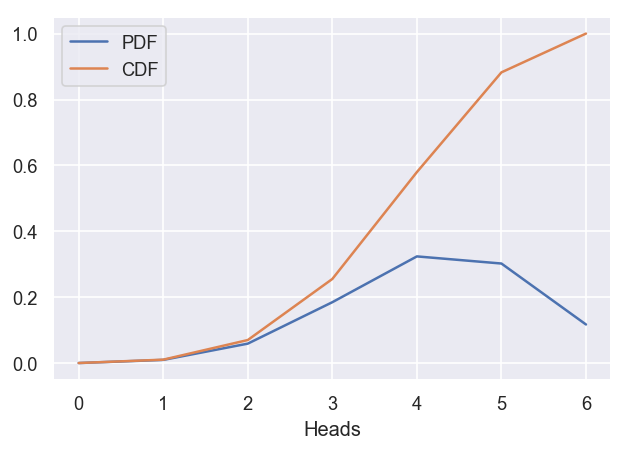

In [51]:
plt.figure(dpi=120)
plt.plot(df["Heads"],df["PDF"],label="PDF")
plt.plot(df["Heads"],df["CDF"],label="CDF")
plt.xlabel("Heads")
plt.legend()
plt.show()

In [53]:
binom.cdf(k=3,n=6,p=0.7)

0.25569000000000003

In [56]:
#Percent point function (inverse of cdf — percentiles).
binom.ppf(q=0.22569, n=6, p=0.7)

3.0

In [59]:
# WHat should be the k value if I want probability to be .50
binom.ppf(q=0.5,n=6,p=0.7)

4.0